# Parte I


## 1. **¿Cómo identifica INDEC a las personas pobres?**

Para identificar a las personas pobres INDEC utiliza la metodología de la línea de pobreza o indigencia, comparando el ingreso total familiar de cada hogar con un conjunto de bienes y servicios. Define una canasta básica alimentaria, compuesta únicamente por alimentos capaces de satisfacer un umbral mínimo de necesidades energéticas y proteicas. Los hogares cuyos ingresos no logren alcanzar esa canasta mediante sus ingresos son considerados indigentes. La línea de pobreza se constituye con la canasta básica total (CBT), que eincluye otros bienes y servicios no alimentarios (vestimenta, transporte, educación, salud, etc.) Para obtener la CBT se utiliza el coeficiente de Engel, definido como la relación entre los gastos alimentarios y los gastos totales observados en la población de referencia. Y dado que las necesidades nutricionales difieren entre la población, se construye una unidad de referencia, "el adulto equivalente", para establecer luego las relaciones en las necesidades energéticas según edad y sexo de las personas. A partir de estas equivalencias se construyen las líneas de pobreza de cada hogar según su tamaño y composición. La caracterización entre pobres y no pobres se extiene a cada una de las personas que integran el hogar.

In [2173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests
import zipfile
import io
import os

pd.options.display.float_format = '{:.0f}'.format

In [2174]:
#Veo si la ruta es correcta
print(os.getcwd())

#Cambio a la ruta del curso
#### DEFINIR SEGÚN CORRESPONDA!!!! ####
os.chdir("C:/Users/admin/Documents/Códigos Pytohn/UNIDAD 1")

#Chequeo que se haya cambiado.
print(os.getcwd())


C:\Users\admin\Documents\Códigos Pytohn\UNIDAD 1
C:\Users\admin\Documents\Códigos Pytohn\UNIDAD 1


---

### a. Selección de región y unión de bases de distintos años 

In [2177]:
#Abrimos la EPH de individuos 2025

eph_individual_25= pd.read_excel("EPH_usu_1_Trim_2025_xls/EPH_usu_1er_Trim_2025_xlsx/usu_individual_T125.xlsx")


In [2178]:
#Filtro por región las bases de 2025

eph_individual_patagonia_25 = eph_individual_25[eph_individual_25['REGION'] == 44]

In [2179]:
#Abrimos la EPH de individuos 2005

eph_individual_05= pd.read_stata("t105_dta/Individual_t105.dta")


In [2180]:
#Filtramos la región

eph_individual_patagonia_05 = eph_individual_05[eph_individual_05["region"]== "Patagónica"]

In [2181]:
#Nos quedamos con variables de interés y renombramos para facilitar tratamiento en EPH 2025

eph_individual_patagonia_25 = eph_individual_patagonia_25[["ANO4","CODUSU", "NRO_HOGAR","CH04", "CH06", "CH07", "CH08", "NIVEL_ED", "ESTADO",
    "CAT_OCUP", "CAT_INAC","ITF", "IPCF", "PP07H", "PP03C", "P47T", "P21", "PP03G"]]

#Pasamos todo a minúscula para poder unir

eph_individual_patagonia_25.columns = eph_individual_patagonia_25.columns.str.lower()


In [2182]:
#Nos quedamos con variables de interés y renombramos para facilitar tratamiento en EPH 2005

eph_individual_patagonia_05 = eph_individual_patagonia_05[["ano4","CODUSU", "nro_hogar","ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado",
    "cat_ocup", "cat_inac","itf", "ipcf", "pp07h", "pp03c", "p47t", "p21", "pp03g"]]

#Pasamos todo a minúscula para poder unir

eph_individual_patagonia_05.columns = eph_individual_patagonia_05.columns.str.lower()

In [2183]:
# Unir ambas bases

eph_individual_patagonia = pd.concat(
    [eph_individual_patagonia_05, eph_individual_patagonia_25])

eph_individual_patagonia.reset_index(drop=True) # index original es descartado

,ano4,codusu,nro_hogar,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_ocup,cat_inac,itf,ipcf,pp07h,pp03c,p47t,p21,pp03g
0,2005,125814,1,Varón,46,Casado,Obra social (incluye PAMI),Secundaria Incompleta,Ocupado,Obrero o empleado,0,2400,480,Sí,...un sólo empleo/ocupación/actividad?,2400,2400,No
1,2005,125814,1,Mujer,32,Casado,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,0,Ama de casa,2400,480,0,0,0,0,0
2,2005,125814,1,Varón,14,Soltero,Obra social (incluye PAMI),Primaria Completa,Inactivo,0,Estudiante,2400,480,0,0,0,0,0
3,2005,125814,1,Varón,9,Soltero,Obra social (incluye PAMI),Primaria Incompleta (incluye educación especial),Menor de 10 años,0,Estudiante,2400,480,0,0,0,0,0
4,2005,125814,1,Mujer,3,Soltero,Obra social (incluye PAMI),Sin instrucción,Menor de 10 años,0,Menor de 6 años,2400,480,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8583,2025,TQRMNORXVHMMKUCDEHGHJ00882475,1,2,55,1,3,4,3,0,4,350000,87500,NaN,NaN,0,0,NaN
8584,2025,TQRMNORXVHMMKUCDEHGHJ00882475,1,1,49,1,3,1,1,2,0,350000,87500,0,1,80000,80000,1
8585,2025,TQRMNORXVHMMKUCDEHGHJ00882475,1,1,35,5,3,1,3,0,6,350000,87500,NaN,NaN,120000,0,NaN
8586,2025,TQRMNORXVHMMKUCDEHGHJ00882475,1,2,26,5,3,3,1,3,0,350000,87500,2,1,150000,150000,2


---

### b. Corregir formato de variables y elaboración de heatmap 

Dado que ambas bases presentan diferencias en su formato —la correspondiente a 2005 contiene las categorías expresadas en texto, mientras que la de 2025 las representa mediante valores numéricos—, resulta necesario unificar los criterios de codificación. En consecuencia, se procedió a estandarizar las variables, transformando todas las categorías a formato textual con el fin de garantizar la coherencia y comparabilidad entre ambas fuentes de datos.

In [2187]:
#Para que las columnas queden todas en el mismo formato

#CH04

def clasificar_sexo(sexo):
    if sexo == 1:
        return "Varón"
    elif sexo == 2:
        return "Mujer"
    else:
        return sexo

eph_individual_patagonia['ch04'] = eph_individual_patagonia['ch04'].apply(clasificar_sexo)

#CH07

def clasificar_estado_civil(estado):
    if estado == 1:
        return "Unido"
    elif estado == 2:
        return "Casado"
    elif estado == 3:
        return "Separado o divorciado"
    elif estado == 4:
        return "Viudo"
    elif estado == 5:
        return "Soltero"
    else:
        return estado

eph_individual_patagonia['ch07'] = eph_individual_patagonia['ch07'].apply(clasificar_estado_civil)

#CH08

def clasificar_cobertura_medica(cobertura):
    if cobertura == 1:
        return "Obra social (incluye PAMI)"
    elif cobertura == 2:
        return "Mutual/Prepaga/Servicio de emergencia"
    elif cobertura == 3:
        return "Planes y seguros públicos"
    elif cobertura == 4:
        return "No paga ni le descuentan"
    elif cobertura == 9:
        return "Ns./Nr."
    elif cobertura == 12:
        return "Obra social y mutual/prepaga/servicio de emergencia"
    elif cobertura == 13:
        return "Obra social y planes y seguros públicos"
    elif cobertura == 23:
        return "Mutual /prepaga/servicio de emergencia/planes y seguros públicos"
    elif cobertura == 123:
        return "Obra social, mutual/prepaga/servicio de emergencia y planes y seguros públicos"
    else:
        return cobertura

eph_individual_patagonia['ch08'] = eph_individual_patagonia['ch08'].apply(clasificar_cobertura_medica)


#Nivel_ed

def clasificar_nivel_ed(educacion):
    if educacion == 1:
        return "Primaria Incompleta (incluye educación especial)"
    elif educacion == 2:
        return "Primaria Completa"
    elif educacion == 3:
        return "Secundaria Incompleta"
    elif educacion == 4:
        return "Secundaria Completa"
    elif educacion == 5:
        return "Superior Universitaria Incompleta"
    elif educacion == 6:
        return "Superior Universitaria Completa"
    elif educacion == 7:
        return "Sin instrucción"
    elif educacion == 9:
        return "Ns./Nr."
    else:
        return educacion

eph_individual_patagonia['nivel_ed'] = eph_individual_patagonia['nivel_ed'].apply(clasificar_nivel_ed)

#Estado

def clasificar_estado(estado):
    if estado == 0:
        return "Entrevista individual no realizada (no respuesta al cuestion"
    elif estado == 1:
        return "Ocupado"
    elif estado == 2:
        return "Desocupado"
    elif estado == 3:
        return "Inactivo"
    elif estado == 4:
        return "Menos de 10 años"
    else:
        return estado

eph_individual_patagonia['estado'] = eph_individual_patagonia['estado'].apply(clasificar_estado)


#CAT_OCUP

def clasificar_cat_ocup(cat_ocup):
    if cat_ocup == 1:
        return "Patrón"
    elif cat_ocup == 2:
        return "Cuenta propia"
    elif cat_ocup == 3:
        return "Obrero o empleado"
    elif cat_ocup == 4:
        return "Trabajador familiar sin remuneración"
    else:
        return cat_ocup

eph_individual_patagonia['cat_ocup'] = eph_individual_patagonia['cat_ocup'].apply(clasificar_cat_ocup)

#CAT_INAC

def clasificar_inactividad(cat_inac):
    if cat_inac == 1:
        return "Jubilado/pensionado"
    elif cat_inac == 2:
        return "Rentista"
    elif cat_inac == 3:
        return "Estudiante"
    elif cat_inac == 4:
        return "Ama de casa"
    elif cat_inac == 5:
        return "Menor de 6 años"
    elif cat_inac == 6:
        return "Discapacitado"
    elif cat_inac == 7:
        return "Otros"
    else:
        return cat_inac

eph_individual_patagonia['cat_inac'] = eph_individual_patagonia['cat_inac'].apply(clasificar_inactividad)

#PP07H

def clasificar_formalidad(formalidad):
    if formalidad == 1:
        return "Sí"
    elif formalidad == 2:
        return "No"
    else:
        return formalidad

eph_individual_patagonia['pp07h'] = eph_individual_patagonia['pp07h'].apply(clasificar_formalidad)


#PP03C

def clasificar_pluriempleo(pluriempleo):
    if pluriempleo == 1:
        return "...un sólo empleo/ocupación/actividad?"
    elif pluriempleo == 2:
        return "...más de un empleo/ocupación/actividad?"
    else:
        return pluriempleo

eph_individual_patagonia['pp03c'] = eph_individual_patagonia['pp03c'].apply(clasificar_pluriempleo)

#PP03G

def clasificar_subempleo(subempleo):
    if subempleo == 1:
        return "Sí"
    elif subempleo == 2:
        return "No"
    else:
        return subempleo

eph_individual_patagonia['pp03g'] = eph_individual_patagonia['pp03g'].apply(clasificar_subempleo)

In [2189]:
#Chequeamos

eph_individual_patagonia.sample(10)

,ano4,codusu,nro_hogar,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_ocup,cat_inac,itf,ipcf,pp07h,pp03c,p47t,p21,pp03g
22307,2025,TQRMNOSPUHJOLNCDEOJAH00874364,1,Mujer,78,Viudo,Obra social (incluye PAMI),Primaria Completa,Inactivo,0,Ama de casa,400000,400000,NaN,NaN,400000,0,NaN
27237,2025,TQRMNORPSHMMKMCDEGNFJ00880826,1,Mujer,22,Soltero,Obra social (incluye PAMI),Superior Universitaria Incompleta,Ocupado,Obrero o empleado,0,3975000,993750,Sí,...un sólo empleo/ocupación/actividad?,525000,350000,No
46968,2005,281224,1,Varón,49,Unido,Obra social (incluye PAMI),Primaria Completa,Inactivo,0,Ama de casa,1850,264,0,0,0,0,0
15211,2025,TQRMNOPWTHMMLMCDEOHCH00878957,1,Varón,26,Unido,Obra social (incluye PAMI),Secundaria Completa,Ocupado,Cuenta propia,0,1647000,549000,0,...un sólo empleo/ocupación/actividad?,800000,800000,No
43851,2005,133739,1,Varón,18,Soltero,No paga ni le descuentan,Primaria Incompleta (incluye educación especial),Ocupado,Cuenta propia,0,1450,242,0,...un sólo empleo/ocupación/actividad?,400,400,Sí
18138,2025,TQRMNORUYHLMLNCDEGNFJ00853342,1,Mujer,42,Unido,No paga ni le descuentan,Primaria Incompleta (incluye educación especial),Inactivo,0,Ama de casa,0,0,NaN,NaN,0,0,NaN
14815,2025,TQRMNOPVVHLOKUCDEGNFJ00853355,1,Mujer,19,Soltero,Obra social (incluye PAMI),Superior Universitaria Incompleta,Inactivo,0,Estudiante,2250000,562500,NaN,NaN,0,0,NaN
10281,2025,TQRMNOPVPHMNLLCDEHGHJ00878873,1,Mujer,45,Soltero,Planes y seguros públicos,Secundaria Incompleta,Ocupado,Obrero o empleado,0,1050000,525000,No,...más de un empleo/ocupación/actividad?,1050000,450000,Sí
45482,2005,130959,1,Mujer,38,Casado,Obra social (incluye PAMI),Primaria Completa,Inactivo,0,Ama de casa,3000,429,0,0,0,0,0
44536,2005,265003,1,Varón,18,Soltero,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,0,Estudiante,1850,370,0,0,0,0,0


Dado que hay variables categóricas que alternan 0 y NAN para respuestas incorrectas o que no corresponden, unificamos todo a NAN.

In [2191]:

# Lista de variables a modificar porque tienen un 0 en vez de NAN y son categoricas
variables = ['cat_ocup', 'cat_inac', 'pp07h', 'pp03c', 'pp03g']

# Reemplazar 0 por NaN en todo el DataFrame
eph_individual_patagonia[variables] = eph_individual_patagonia[variables].replace(0, np.nan)

eph_individual_patagonia['ch08'] = eph_individual_patagonia['ch08'].replace(['Ns./Nr.'],np.nan)

eph_individual_patagonia.loc[~eph_individual_patagonia['estado'].isin(['Ocupado', 
                                                                       'Inactivo', 'Menor de 10 años', 'Desocupado']),'estado'] = np.nan

Reviso que todas las variables tengan formatos correctos.

In [2193]:
print('\nTypes:\n', eph_individual_patagonia.dtypes)


Types:
 ano4         float64
codusu        object
nro_hogar    float64
ch04          object
ch06          object
ch07          object
ch08          object
nivel_ed      object
estado        object
cat_ocup      object
cat_inac      object
itf          float64
ipcf         float64
pp07h         object
pp03c         object
p47t         float64
p21          float64
pp03g         object
dtype: object


In [2194]:
#Paso de objeto a categoría y vuelvo a chequear

cols_obj = eph_individual_patagonia.select_dtypes(include='object').columns
eph_individual_patagonia[cols_obj] = eph_individual_patagonia[cols_obj].astype('category')

print('\nTypes:\n', eph_individual_patagonia.dtypes)


Types:
 ano4          float64
codusu       category
nro_hogar     float64
ch04         category
ch06         category
ch07         category
ch08         category
nivel_ed     category
estado       category
cat_ocup     category
cat_inac     category
itf           float64
ipcf          float64
pp07h        category
pp03c        category
p47t          float64
p21           float64
pp03g        category
dtype: object


**Armo el heatmap**

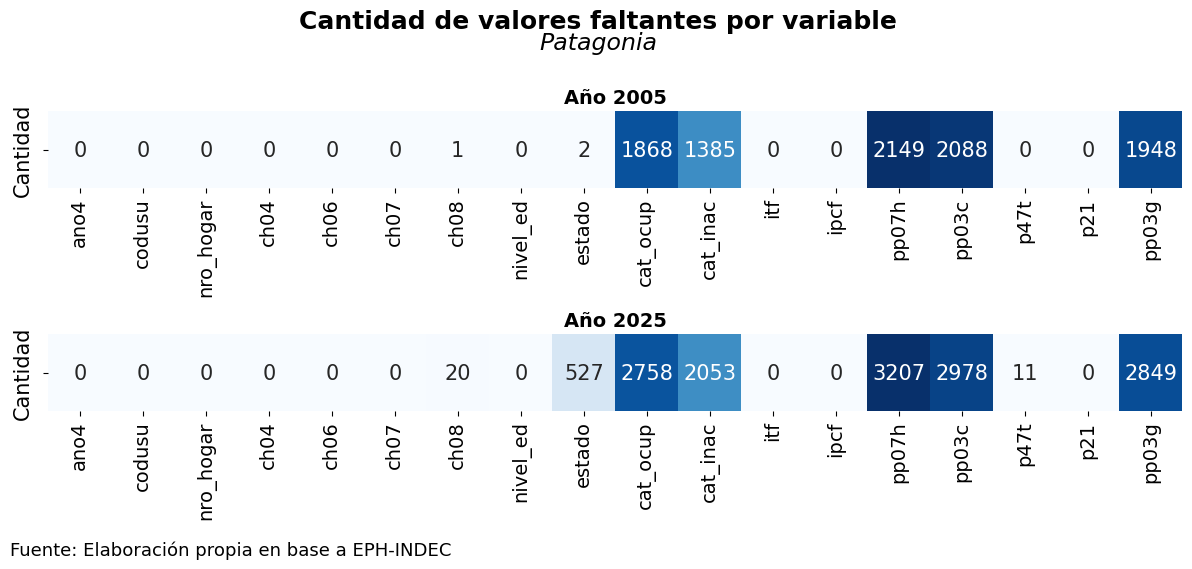

In [2322]:
#Separo los años
anios = eph_individual_patagonia['ano4'].unique()

# Creamos una figura general (ajustá el tamaño según la cantidad de años)
fig = plt.figure(figsize=(12, 5))

# Título principal (negrita)
plt.suptitle('Cantidad de valores faltantes por variable',fontsize=18, fontweight='bold', y=1.05)

# Subtítulo en cursiva, más chico y justo debajo
plt.figtext(0.5, 0.97, 'Patagonia',ha='center', fontsize=17, style='italic')


# Iteramos los años y creamos subplots
for i, año in enumerate(anios, 1):
    plt.subplot(len(anios), 1, i)
    df_año = eph_individual_patagonia[eph_individual_patagonia['ano4'] == año]
    faltantes = df_año.isnull().sum().to_frame(name='').T

    sns.heatmap(faltantes, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize": 15})
    plt.title(f'Año {int(año)}', fontsize=14, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Cantidad', fontsize=15)
    plt.tick_params(axis='both', labelsize=14)

fig.text(0.01, -0.05, 'Fuente: Elaboración propia en base a EPH-INDEC', ha='left', va='bottom', fontsize=13, color='black')
plt.tight_layout()
fig.savefig("heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


Las variables con más faltantes son PP07H, PP03C, PP03G, CAT_OCUP y CAT_INAC. En todos los casos se da mas que nada en el año 2025, algo que es bastante lógico porque tiene más observaciones.

In [2198]:
#Cantidad de observaciones

eph_individual_patagonia['ano4'].value_counts().sort_index()

ano4
2005    3229
2025    5359
Name: count, dtype: int64

### c. Corregir valores sin sentido 

In [2200]:
eph_individual_patagonia.describe()

,ano4,nro_hogar,itf,ipcf,p47t,p21
count,8588,8588,8588,8588,8577,8588
mean,2017,1,968219,345022,367793,239167
std,10,1,1530093,586695,809224,661010
min,2005,1,0,0,-9,-9
25%,2005,1,1000,238,0,0
50%,2025,1,5700,1774,240,0
75%,2025,1,1600000,525000,500000,1600
max,2025,72,26400000,13050000,25000000,25000000


In [2201]:
eph_individual_patagonia.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 8588 entries, 43801 to 45327
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ano4       8588 non-null   float64 
 1   codusu     8588 non-null   category
 2   nro_hogar  8588 non-null   float64 
 3   ch04       8588 non-null   category
 4   ch06       8588 non-null   category
 5   ch07       8588 non-null   category
 6   ch08       8567 non-null   category
 7   nivel_ed   8588 non-null   category
 8   estado     8026 non-null   category
 9   cat_ocup   3777 non-null   category
 10  cat_inac   4747 non-null   category
 11  itf        8588 non-null   float64 
 12  ipcf       8588 non-null   float64 
 13  pp07h      2934 non-null   category
 14  pp03c      3318 non-null   category
 15  p47t       8577 non-null   float64 
 16  p21        8588 non-null   float64 
 17  pp03g      3604 non-null   category
dtypes: category(12), float64(6)
memory usage: 671.7 KB


In [2202]:
eph_individual_patagonia['p47t'].value_counts().sort_index()

p47t
-9           555
0           3566
12             1
18             1
20             1
            ... 
6500000        1
6700000        1
9000000        1
14000000       1
25000000       2
Name: count, Length: 651, dtype: int64

In [2203]:
eph_individual_patagonia['p21'].value_counts().sort_index()

p21
-9           377
0           5051
9              2
30             1
45             1
            ... 
5500000        1
6000000        1
14000000       1
20000000       1
25000000       1
Name: count, Length: 315, dtype: int64

In [2204]:
eph_individual_patagonia['itf'].value_counts().sort_index()

itf
0           1225
20             1
50             4
72             5
80             1
            ... 
10000000       4
11000000       2
14700000       2
26100000       2
26400000       4
Name: count, Length: 784, dtype: int64

In [2205]:
eph_individual_patagonia['ipcf'].value_counts().sort_index()

ipcf
0           1225
14             5
17             3
19             8
20             1
            ... 
5500000        2
5750000        1
6600000        4
7350000        2
13050000       2
Name: count, Length: 1033, dtype: int64

El primer dato raro es el -9 en p47 y p21 que son el ingreso total y el de la ocupación principal de cada individuo.
Revisamos que formato de respuestas tiene:

In [2207]:
eph_individual_patagonia[eph_individual_patagonia['p47t'] == -9]

,ano4,codusu,nro_hogar,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_ocup,cat_inac,itf,ipcf,pp07h,pp03c,p47t,p21,pp03g
101,2025,TQRMNOQPYHLMKOCDEIHJF00854750,1,Mujer,38,Unido,Obra social (incluye PAMI),Secundaria Completa,Ocupado,Obrero o empleado,NaN,0,0,Sí,...un sólo empleo/ocupación/actividad?,-9,-9,No
420,2025,TQRMNOPYXHJOKMCDEOJAH00875900,1,Varón,37,Soltero,No paga ni le descuentan,Primaria Completa,Ocupado,Cuenta propia,NaN,0,0,NaN,...un sólo empleo/ocupación/actividad?,-9,-9,No
604,2025,TQRMNOTTTHMOKQCDEFPCH00877924,1,Varón,61,Casado,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,NaN,Jubilado/pensionado,0,0,NaN,NaN,-9,0,NaN
632,2025,TQRMNOTUSHMMKQCDEHGHJ00877609,1,Mujer,31,Soltero,Obra social (incluye PAMI),Secundaria Incompleta,Ocupado,Obrero o empleado,NaN,0,0,Sí,...un sólo empleo/ocupación/actividad?,-9,-9,No
668,2025,TQRMNOSPVHLKKMCDEFPCH00852458,1,Mujer,74,Viudo,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,NaN,Jubilado/pensionado,0,0,NaN,NaN,-9,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45113,2025,TQRMNOPSVHKMLNCDEGNFJ00858963,1,Varón,53,Unido,Obra social (incluye PAMI),Secundaria Completa,Ocupado,Obrero o empleado,NaN,0,0,Sí,...un sólo empleo/ocupación/actividad?,-9,-9,No
45130,2025,TQRMNOQPPHKMLLCDEFPCH00858632,1,Varón,44,Casado,Obra social (incluye PAMI),Superior Universitaria Completa,Ocupado,Obrero o empleado,NaN,0,0,Sí,...un sólo empleo/ocupación/actividad?,-9,-9,No
45159,2025,TQRMNOSSYHLMLPCDEGNFJ00853319,1,Varón,40,Soltero,Obra social (incluye PAMI),Secundaria Incompleta,Ocupado,Obrero o empleado,NaN,0,0,Sí,...un sólo empleo/ocupación/actividad?,-9,-9,No
45252,2025,TQRMNOTPXHJOKTCDEHGHJ00874517,1,Mujer,54,Soltero,Obra social (incluye PAMI),Superior Universitaria Completa,Inactivo,NaN,Jubilado/pensionado,0,0,NaN,NaN,-9,0,NaN


No se ve nada raro, así que se eliminan, ya que lo más probable es que sean no respuestas.

In [2209]:
eph_individual_patagonia = eph_individual_patagonia[(eph_individual_patagonia['p47t'] != -9) & (eph_individual_patagonia['p21'] != -9)]

Corregimos edad que tiene un valor string "Menos de 1 año" y también tiene un valor negativo

In [2211]:
eph_individual_patagonia['ch06'].unique()

[46, 32, 14, 9, 3, ..., 87, 83, 91, 88, 98]
Length: 98
Categories (99, object): [-1, 1, 2, 3, ..., 95, 96, 98, 'Menos de 1 año']

In [2212]:
eph_individual_patagonia['ch06'] = (eph_individual_patagonia['ch06'].replace('Menos de 1 año', 0)).astype(int)

C:\Users\admin\AppData\Local\Temp\ipykernel_28580\4125960836.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eph_individual_patagonia['ch06'] = (eph_individual_patagonia['ch06'].replace('Menos de 1 año', 0)).astype(int)
C:\Users\admin\AppData\Local\Temp\ipykernel_28580\4125960836.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  eph_individual_patagonia['ch06'] = (eph_individual_patagonia['ch06'].replace('Menos de 1 año', 0)).astype(int)


In [2213]:
eph_individual_patagonia = eph_individual_patagonia[(eph_individual_patagonia['ch06'] != -1)]

---

# Parte II

## 3. Gráfico de barras de composición por sexo por año

C:\Users\admin\AppData\Local\Temp\ipykernel_28580\3706310046.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_sexo = (eph_individual_patagonia.groupby(['ano4', 'ch04']).size().reset_index(name='cantidad'))


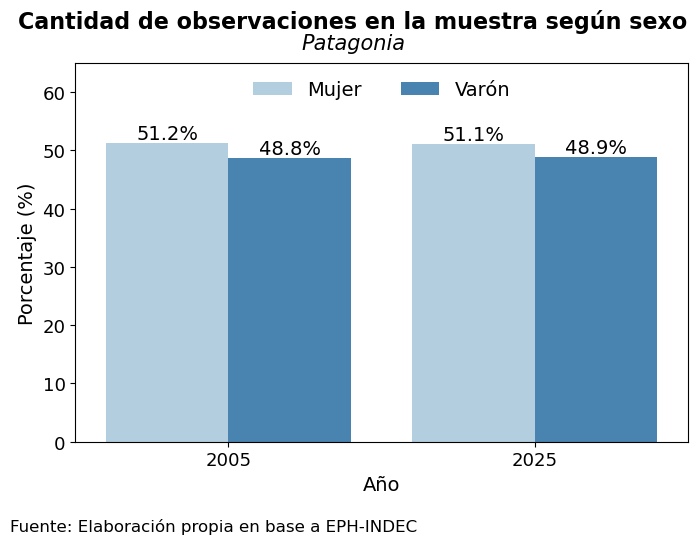

In [2316]:
# Contar observaciones por sexo y año

conteo_sexo = (eph_individual_patagonia.groupby(['ano4', 'ch04']).size().reset_index(name='cantidad'))

conteo_sexo['ano4'] = conteo_sexo['ano4'].astype(int)

# Calcular proporciones (%) dentro de cada año
conteo_sexo['proporcion'] = (conteo_sexo.groupby('ano4')['cantidad'].transform(lambda x: x / x.sum() * 100))

# Graficar proporciones en un mismo gráfico
fig = plt.figure(figsize=(7,5))
sns.barplot(data=conteo_sexo, x='ano4', y='proporcion', hue='ch04', palette='Blues')

# Título principal (negrita)
plt.suptitle('Cantidad de observaciones en la muestra según sexo',fontsize=16, fontweight='bold', y=1.0)

# Subtítulo en cursiva, más chico y justo debajo
plt.figtext(0.5, 0.92, 'Patagonia',ha='center', fontsize=15, style='italic')

plt.xlabel('Año', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=14)
plt.ylim(0, 65)
plt.legend(title='', loc='upper center', ncol=2, frameon=False, fontsize=14)
plt.tick_params(axis='both', labelsize=13)

# Agregar etiquetas de porcentaje sobre las barras
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=14)

fig.text(0.01, -0.05, 'Fuente: Elaboración propia en base a EPH-INDEC', ha='left', va='bottom', fontsize=12, color='black')

plt.tight_layout()
fig.savefig("valores_faltantes.png", dpi=300, bbox_inches="tight")
plt.show()


No hubo grandes cambios en la composición de la muestra

## 4. Matriz de correlación

In [2220]:
#Simplificamos variables para que se reduzca la dimesionalidad del gráfico de correlaciones

##CH08

eph_individual_patagonia_corr = eph_individual_patagonia.dropna(subset=['ch08'])

def tiene_cobertura_correcta(x):
    if x == 'No paga ni le descuentan':
        return 'Sin cobertura médica'
    else:
        return 'Con cobertura médica'

eph_individual_patagonia_corr['ch08_binaria'] = eph_individual_patagonia_corr['ch08'].apply(tiene_cobertura_correcta)


##CH07

eph_individual_patagonia_corr = eph_individual_patagonia_corr.dropna(subset=['ch07'])

def casado(x):
    if x == 'Casado':
        return 'Casado'
    else:
        return 'No casado'

eph_individual_patagonia_corr['ch07_binaria'] = eph_individual_patagonia_corr['ch07'].apply(casado)


##ESTADO

eph_individual_patagonia_corr = eph_individual_patagonia_corr.dropna(subset=['estado'])

##NIVEL_ED

def nivel_educativo(x):
    if x == 'Primaria Incompleta (incluye educación especial)':
        return 'Sin instrucción'
    elif x in ['Primaria Completa', 'Secundaria Incompleta']:
        return 'Estudios escolares incompletos'
    elif x in ['Secundaria Completa', 'Superior Unversitaria Incompleta']:
        return 'Estudios escolares completos'
    else:
        return 'Estudios universitarios'

eph_individual_patagonia_corr['nivel_ed_agrupado'] = eph_individual_patagonia_corr['nivel_ed'].apply(nivel_educativo)


#Nos quedamos con las variables de interés

eph_variables_correlacion = eph_individual_patagonia_corr[['ch04', 'ch06', 'ch07_binaria', 'ch08_binaria', 'nivel_ed_agrupado', 'estado', 'cat_inac', 'ipcf']]


#las renombro para facilitar lectura

eph_variables_correlacion = eph_variables_correlacion.rename(columns={'ch04': 'sexo','ch06': 'edad','ch07_binaria': 'estadocivil','ch08_binaria': 'coberturamedica', 
                                                                      'cat_inac':'inactivo', 'nivel_ed_agrupado':'niveled'})

eph_variables_correlacion['edad'] = pd.to_numeric(eph_variables_correlacion['edad'], errors='coerce')

#Construimos las variables dicotómicas con las categóricas:

categoricas = eph_variables_correlacion.select_dtypes(include=['category','object']).columns

dummies = pd.get_dummies(eph_variables_correlacion[categoricas], drop_first=False, dtype=int)

dummies.columns = [col.split('_', 1)[-1] for col in dummies.columns]

# Unimos las numéricas con las dummies
eph_variables_correlacion_dummies = pd.concat([eph_variables_correlacion.drop(columns=categoricas), dummies],axis=1)

#Chequeamos
eph_variables_correlacion_dummies.head(5)

C:\Users\admin\AppData\Local\Temp\ipykernel_28580\188808118.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eph_individual_patagonia_corr['ch08_binaria'] = eph_individual_patagonia_corr['ch08'].apply(tiene_cobertura_correcta)


,edad,ipcf,Mujer,Varón,Casado,No casado,Con cobertura médica,Sin cobertura médica,Estudios escolares completos,Estudios escolares incompletos,...,Inactivo,Menor de 10 años,Ocupado,Ama de casa,Discapacitado,Estudiante,Jubilado/pensionado,Menor de 6 años,Otros,Rentista
43801,46,480,0,1,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
43802,32,480,1,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,0
43803,14,480,0,1,0,1,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0
43804,9,480,0,1,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
43805,3,480,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [2221]:
#Ahora generamos las dicotómicas para las variable cotinuas. Necestiamos dos pasos: primero generar categóricas desde las variables originales 
#y luego generamos si generamos las dummies.

##Edad##

eph_variables_correlacion_dummies['menor'] = (eph_variables_correlacion_dummies['edad'] < 18).astype(int)
eph_variables_correlacion_dummies['adulto_joven'] = ((eph_variables_correlacion_dummies['edad'] >= 18) & 
                                                     (eph_variables_correlacion_dummies['edad'] < 30)).astype(int)
eph_variables_correlacion_dummies['adulto'] = ((eph_variables_correlacion_dummies['edad'] >= 30) &
                                               (eph_variables_correlacion_dummies['edad'] < 60)).astype(int)
eph_variables_correlacion_dummies['adulto_mayor'] = (eph_variables_correlacion_dummies['edad'] >= 60).astype(int)

##IPCF##

#Primero pasamos la variable continua a categórica en función de los cuartiles
eph_variables_correlacion_dummies['ipcf_cuartil'] = pd.qcut(eph_variables_correlacion_dummies['ipcf'],q=4,labels=['Ingreso Bajo', 'Ingreso Medio-bajo', 
                                                                                                  'Ingreso Medio-alto', 'Ingreso Alto'])
#Creamos las variables con dummies
eph_variables_correlacion_dummies['ingreso_bajo'] = (eph_variables_correlacion_dummies['ipcf_cuartil'] == 'Ingreso Bajo').astype(int)
eph_variables_correlacion_dummies['ingreso_medio'] = (eph_variables_correlacion_dummies['ipcf_cuartil'] == 'Ingreso Medio-bajo').astype(int)
eph_variables_correlacion_dummies['ingreso_medio'] = (eph_variables_correlacion_dummies['ipcf_cuartil'] == 'Ingreso Medio-alto').astype(int)
eph_variables_correlacion_dummies['ingreso_alto'] = (eph_variables_correlacion_dummies['ipcf_cuartil'] == 'Ingreso Alto').astype(int)

#Eliminamos las variables continuas y categóricas que ya no necesitamos para quedarnos con todas las dummies

eph_variables_correlacion_dummies.head(5)

eph_variables_correlacion_dummies = eph_variables_correlacion_dummies.drop(columns=['ipcf_cuartil','ipcf','edad'])

eph_variables_correlacion_dummies.head(5)


,Mujer,Varón,Casado,No casado,Con cobertura médica,Sin cobertura médica,Estudios escolares completos,Estudios escolares incompletos,Estudios universitarios,Sin instrucción,...,Menor de 6 años,Otros,Rentista,menor,adulto_joven,adulto,adulto_mayor,ingreso_bajo,ingreso_medio,ingreso_alto
43801,0,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
43802,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
43803,0,1,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
43804,0,1,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
43805,1,0,0,1,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


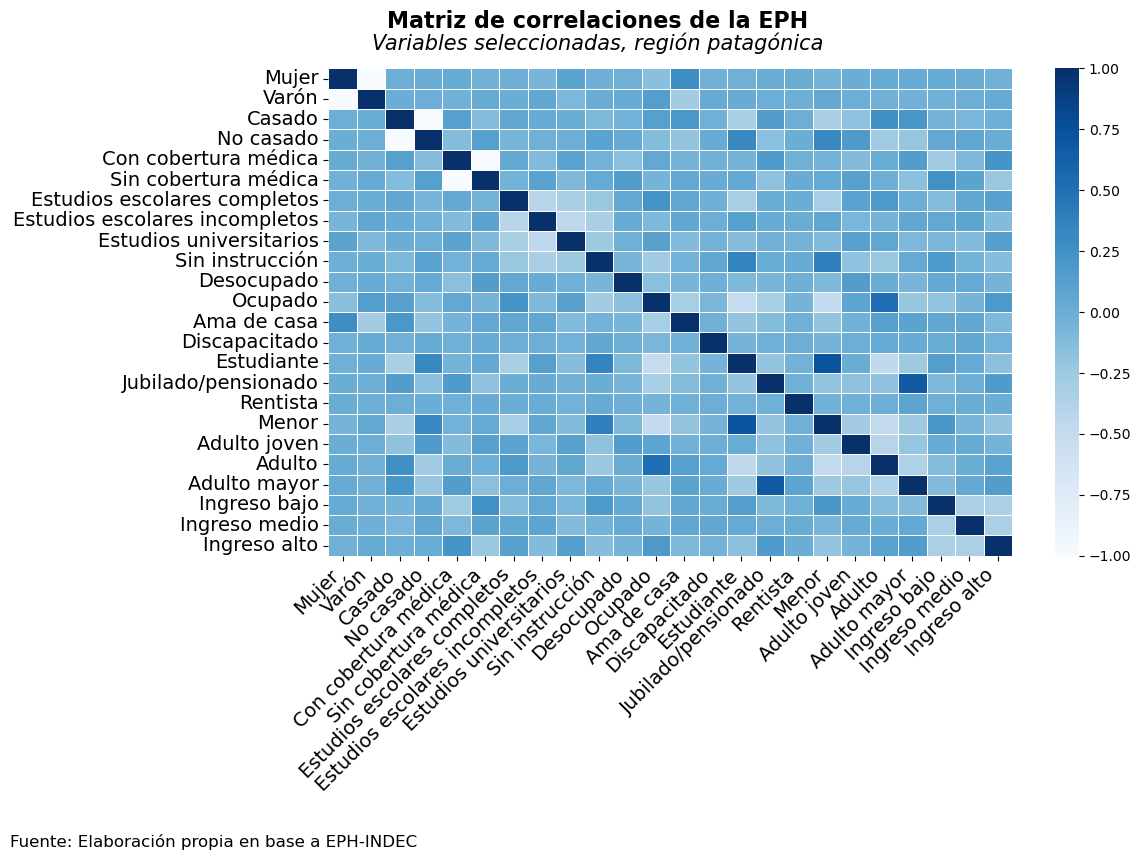

In [2324]:
#Elimino algunas variables del gráfico porque pueden estar repetidas y para reducir dimensionalidad y simplificarlo
variables_a_excluir = ['Menor de 10 años', 'Menor de 6 años', 'Otros', 'Inactivo']

matriz_corr = eph_variables_correlacion_dummies.drop(columns=variables_a_excluir).corr(numeric_only=True)

#Renombro variables para el gráfico

nuevos_nombres = {'adulto_joven': 'Adulto joven',
    'adulto': 'Adulto',
    'menor': 'Menor',
    'adulto_mayor': 'Adulto mayor',
    'ingreso_bajo': 'Ingreso bajo',
    'ingreso_medio': 'Ingreso medio',
    'ingreso_alto': 'Ingreso alto'}

matriz_corr = matriz_corr.rename(columns=nuevos_nombres, index=nuevos_nombres)

# Crear gráfico tipo heatmap
fig = plt.figure(figsize=(12, 8))
sns.heatmap(
    matriz_corr,
    annot=False,        # muestra valores
    cmap="Blues",      # paleta de colores
    linewidths=0.5,    # líneas divisorias
    cbar=True          # barra lateral
)


plt.suptitle('Matriz de correlaciones de la EPH',fontsize=16, fontweight='bold', y=1.0)


plt.figtext(0.5, 0.95, 'Variables seleccionadas, región patagónica',ha='center', fontsize=15, style='italic')
fig.text(0.01, -0.05, 'Fuente: Elaboración propia en base a EPH-INDEC', ha='left', va='bottom', fontsize=12, color='black')

plt.xticks(rotation=45, ha="right", fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.tight_layout()
fig.savefig("correlaciones.png", dpi=300, bbox_inches="tight")
plt.show()


---

# Parte III

## 5.

### ¿Cuántas personas no respondieron cuál es su condición de actividad?

In [2227]:
#Previamente pasamos a NAN los 0 en la variable ESTADO

eph_individual_patagonia.groupby('ano4')['estado'].apply(lambda x: x.isna().sum())

ano4
2005      2
2025    527
Name: estado, dtype: int64

En total 529 personas de las encuestas no contestaron: 2 de la EPH de 2005 y 527 de la encuesta de 2025.

### Crear df respondieron y no respondieron según valores de itf

In [2230]:
respondieron = eph_individual_patagonia[eph_individual_patagonia['itf'] != 0]

respondieron['itf'].value_counts().sort_index()

itf
20          1
50          4
72          5
80          1
100         3
           ..
10000000    4
11000000    2
14700000    2
26100000    2
26400000    4
Name: count, Length: 783, dtype: int64

In [2231]:
norespondieron = eph_individual_patagonia[eph_individual_patagonia['itf'] == 0]

norespondieron['itf'].value_counts().sort_index()

itf
0    660
Name: count, dtype: int64

## 6. DF con variable adulto_equiv

In [2233]:
adulto_equiv= pd.read_excel("tabla_adulto_equiv.xlsx")

pd.options.display.float_format = '{:.2f}'.format

adulto_equiv.head(5)


#Pasamos a formato wide para facilitar el join con la base EPH

adulto_equiv_long = adulto_equiv.melt(id_vars='Edad',value_vars=['Mujer', 'Varón'],var_name='Sexo',value_name='adulto_equiv')

adulto_equiv_long.head(23)



,Edad,Sexo,adulto_equiv
0,0 años,Mujer,0.35
1,1 años,Mujer,0.37
2,2 años,Mujer,0.46
3,3 años,Mujer,0.51
4,4 años,Mujer,0.55
5,5 años,Mujer,0.60
6,6 años,Mujer,0.64
7,7 años,Mujer,0.66
8,8 años,Mujer,0.68
9,9 años,Mujer,0.69


In [2234]:
## Armo una variable de edad igual a la de adult_equiv de edad para poder hacer el join

def cat_edad(x):
    if 18 <= x <= 29:
        return '18 a 29 años'
    elif 30 <= x <= 45:
        return '30 a 45 años'
    elif 46 <= x <= 60:
        return '46 a 60 años'
    elif 61 <= x <= 75:
        return '61 a 75 años'
    elif x > 75:
        return 'más de 75 años'
    else:
        return f'{int(x)} años'

respondieron['Edad'] = respondieron['ch06'].apply(cat_edad)

respondieron = respondieron.rename(columns={'ch04':'Sexo'})

C:\Users\admin\AppData\Local\Temp\ipykernel_28580\13579428.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['Edad'] = respondieron['ch06'].apply(cat_edad)


In [2235]:
# Mergeamos ambas bases

respondieron = pd.merge(respondieron, adulto_equiv_long, on=['Edad','Sexo'], how='left')

respondieron.sample(50)

,ano4,codusu,nro_hogar,Sexo,ch06,ch07,ch08,nivel_ed,estado,cat_ocup,cat_inac,itf,ipcf,pp07h,pp03c,p47t,p21,pp03g,Edad,adulto_equiv
6130,2025.00,TQRMNORPRHMMKMCDEGNFJ00880615,1.00,Varón,59,Casado,Obra social (incluye PAMI),Secundaria Completa,Inactivo,NaN,Jubilado/pensionado,2330000.00,776666.67,NaN,NaN,1200000.00,0.00,NaN,46 a 60 años,1.00
2254,2005.00,255801,2.00,Mujer,39,Casado,Obra social (incluye PAMI),Superior Universitaria Incompleta,Inactivo,NaN,Ama de casa,4050.00,810.00,NaN,NaN,0.00,0.00,NaN,30 a 45 años,0.77
6434,2025.00,TQRMNOPQSHJMKMCDEIHJF00881179,1.00,Varón,55,Soltero,No paga ni le descuentan,Secundaria Incompleta,Inactivo,NaN,Rentista,1250000.00,625000.00,NaN,NaN,500000.00,0.00,NaN,46 a 60 años,1.00
6651,2025.00,TQRMNOPVXHLMKRCDEIHJF00854659,1.00,Mujer,33,Soltero,Obra social (incluye PAMI),Secundaria Completa,Ocupado,Obrero o empleado,NaN,2800000.00,700000.00,Sí,...un sólo empleo/ocupación/actividad?,1600000.00,1080000.00,No,30 a 45 años,0.77
5427,2025.00,TQRMNOPUPHMMKOCDEIHJF00880517,1.00,Mujer,15,Soltero,Mutual/Prepaga/Servicio de emergencia,Secundaria Incompleta,Inactivo,NaN,Estudiante,1700000.00,850000.00,NaN,NaN,0.00,0.00,NaN,15 años,0.77
4183,2025.00,TQRMNOPXRHJOKRCDEGNFJ00873172,1.00,Mujer,29,Unido,Obra social (incluye PAMI),Secundaria Completa,Ocupado,Obrero o empleado,NaN,2800000.00,560000.00,Sí,...un sólo empleo/ocupación/actividad?,900000.00,900000.00,No,18 a 29 años,0.76
4095,2025.00,TQRMNOPWTHMOKSCDEGNFJ00878672,1.00,Mujer,38,Casado,No paga ni le descuentan,Secundaria Incompleta,Inactivo,NaN,Ama de casa,2000000.00,400000.00,NaN,NaN,0.00,0.00,NaN,30 a 45 años,0.77
3654,2025.00,TQRMNORWRHJMLQCDEGNFJ00876372,1.00,Mujer,49,Separado o divorciado,Obra social (incluye PAMI),Superior Universitaria Completa,Ocupado,Obrero o empleado,NaN,1680000.00,560000.00,Sí,NaN,1680000.00,520000.00,No,46 a 60 años,0.76
2251,2005.00,251811,1.00,Mujer,6,Soltero,Obra social (incluye PAMI),Primaria Incompleta (incluye educación especial),Menor de 10 años,NaN,Estudiante,1500.00,375.00,NaN,NaN,0.00,0.00,NaN,6 años,0.64
903,2005.00,139599,1.00,Mujer,41,Separado o divorciado,No paga ni le descuentan,Primaria Completa,Ocupado,Obrero o empleado,NaN,400.00,133.33,No,...un sólo empleo/ocupación/actividad?,400.00,0.00,Sí,30 a 45 años,0.77


In [2236]:
respondieron['adulto_equiv'].describe()

count   7340.00
mean       0.81
std        0.15
min        0.35
25%        0.76
50%        0.77
75%        1.00
max        1.04
Name: adulto_equiv, dtype: float64

In [2237]:
# Arreglo los formatos de las variables para que no haya inconsistencias.

respondieron = respondieron.assign(codusu = respondieron['codusu'].astype(str).str.strip(),
                                   nro_hogar = respondieron['nro_hogar'].astype(str).str.strip(),ano4 = respondieron['ano4'].astype(int))

In [2238]:
respondieron_agrupado = (respondieron.groupby(['ano4', 'codusu', 'nro_hogar'], as_index=False)['adulto_equiv'].sum())

respondieron_agrupado = respondieron_agrupado.rename(columns={'adulto_equiv':'ad_equiv_hogar'})


respondieron_agrupado.sample(10)

,ano4,codusu,nro_hogar,ad_equiv_hogar
2549,2025,TQRMNOVYTHMMKNCDEIHJF00880926,1.0,1.77
1547,2025,TQRMNOQVPHKMKUCDEOHCH00857583,1.0,2.00
1178,2025,TQRMNOPVSHLOKTCDEGNFJ00853261,1.0,2.44
73,2005,137928,1.0,2.15
2400,2025,TQRMNOTTYHMMLNCDEOHCH00881490,1.0,4.56
1662,2025,TQRMNOQYPHMLKMCDEIHJF00880910,1.0,3.30
898,2005,281301,1.0,1.78
1462,2025,TQRMNOQSRHLLKTCDEOHCH00856135,1.0,2.17
86,2005,140407,1.0,3.74
286,2005,178419,1.0,5.20


In [2239]:
# Agregamos la columna creada a la base respondieron

respondieron = pd.merge(respondieron, respondieron_agrupado, on=['ano4','codusu', 'nro_hogar'], how='left')

respondieron.sample(50)

,ano4,codusu,nro_hogar,Sexo,ch06,ch07,ch08,nivel_ed,estado,cat_ocup,...,itf,ipcf,pp07h,pp03c,p47t,p21,pp03g,Edad,adulto_equiv,ad_equiv_hogar
643,2005,247355,1.0,Varón,9,Soltero,No paga ni le descuentan,Primaria Incompleta (incluye educación especial),Menor de 10 años,NaN,...,300.00,60.00,NaN,NaN,0.00,0.00,NaN,9 años,0.69,3.68
1387,2005,241754,1.0,Varón,26,Soltero,No paga ni le descuentan,Superior Universitaria Completa,Desocupado,Obrero o empleado,...,2330.00,466.00,NaN,NaN,0.00,0.00,NaN,18 a 29 años,1.02,4.82
5660,2025,TQRMNOQVXHKMKRCDEGNFJ00857165,1.0,Varón,41,Soltero,Obra social (incluye PAMI),Superior Universitaria Completa,Desocupado,Obrero o empleado,...,5400000.00,1800000.00,NaN,NaN,0.00,0.00,NaN,30 a 45 años,1.00,2.37
3561,2025,TQRMNOSQQHMNKUCDEGNFJ00878040,1.0,Varón,33,Unido,Obra social (incluye PAMI),Secundaria Completa,Ocupado,Obrero o empleado,...,3080000.00,1026666.67,Sí,...un sólo empleo/ocupación/actividad?,2000000.00,2000000.00,No,30 a 45 años,1.00,2.32
4163,2025,TQRMNOTVVHJOKQCDEGNFJ00873171,1.0,Varón,12,Soltero,No paga ni le descuentan,Secundaria Incompleta,Inactivo,NaN,...,1870000.00,233750.00,NaN,NaN,0.00,0.00,NaN,12 años,0.85,6.75
7034,2025,TQRMNOTVVHKMKPCDEFPCH00862583,1.0,Mujer,79,Separado o divorciado,Obra social (incluye PAMI),Primaria Incompleta (incluye educación especial),Inactivo,NaN,...,675000.00,675000.00,NaN,NaN,675000.00,0.00,NaN,más de 75 años,0.63,0.63
1507,2005,259957,1.0,Varón,28,Soltero,Obra social (incluye PAMI),Superior Universitaria Incompleta,Ocupado,Obrero o empleado,...,2900.00,966.67,Sí,NaN,400.00,400.00,No,18 a 29 años,1.02,2.78
571,2005,234574,1.0,Varón,38,Soltero,No paga ni le descuentan,Primaria Completa,Ocupado,Obrero o empleado,...,1593.00,398.25,No,...un sólo empleo/ocupación/actividad?,600.00,600.00,No,30 a 45 años,1.00,3.43
6828,2025,TQRMNOQUVHMOKUCDEIHJF00881694,1.0,Mujer,38,Unido,Obra social (incluye PAMI),Secundaria Completa,Ocupado,Obrero o empleado,...,4050000.00,1350000.00,Sí,...un sólo empleo/ocupación/actividad?,2250000.00,1500000.00,Sí,30 a 45 años,0.77,2.51
5839,2025,TQRMNOQSTHMKKUCDEOJAH00880573,1.0,Mujer,46,Viudo,Obra social (incluye PAMI),Superior Universitaria Completa,Ocupado,Obrero o empleado,...,2400000.00,1200000.00,Sí,...un sólo empleo/ocupación/actividad?,2400000.00,1200000.00,No,46 a 60 años,0.76,1.48


## 7. Agregar columna ingreso_necesario

In [2241]:
respondieron.loc[respondieron['ano4'] == 2005, 'ingreso_necesario'] = (respondieron['ad_equiv_hogar'] * 205.07)

respondieron.loc[respondieron['ano4'] == 2025, 'ingreso_necesario'] = (respondieron['ad_equiv_hogar'] * 365177)

respondieron.sample(50)

,ano4,codusu,nro_hogar,Sexo,ch06,ch07,ch08,nivel_ed,estado,cat_ocup,...,ipcf,pp07h,pp03c,p47t,p21,pp03g,Edad,adulto_equiv,ad_equiv_hogar,ingreso_necesario
1640,2005,126160,1.0,Mujer,55,Soltero,Obra social (incluye PAMI),Secundaria Incompleta,Ocupado,Obrero o empleado,...,650.00,Sí,...un sólo empleo/ocupación/actividad?,650.00,450.00,No,46 a 60 años,0.76,0.76,155.85
1141,2005,186288,1.0,Mujer,27,Soltero,No paga ni le descuentan,Superior Universitaria Incompleta,Inactivo,NaN,...,144.00,NaN,NaN,0.00,0.00,NaN,18 a 29 años,0.76,3.24,664.43
1267,2005,217178,2.0,Mujer,36,Casado,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,NaN,...,275.00,NaN,NaN,0.00,0.00,NaN,30 a 45 años,0.77,3.30,676.73
2233,2005,249524,1.0,Mujer,12,Soltero,Obra social (incluye PAMI),Primaria Incompleta (incluye educación especial),Inactivo,NaN,...,428.50,NaN,NaN,0.00,0.00,NaN,12 años,0.74,3.30,676.73
336,2005,194202,1.0,Varón,65,Separado o divorciado,Obra social (incluye PAMI),Secundaria Incompleta,Ocupado,Obrero o empleado,...,1200.00,Sí,NaN,1200.00,1200.00,No,61 a 75 años,0.83,0.83,170.21
5629,2025,TQRMNOSWVHMMLNCDEGNFJ00880415,1.0,Varón,52,Unido,Obra social (incluye PAMI),Superior Universitaria Incompleta,Ocupado,Cuenta propia,...,1425000.00,NaN,...un sólo empleo/ocupación/actividad?,900000.00,600000.00,No,46 a 60 años,1.00,3.54,1292726.58
3578,2025,TQRMNOQVXHJLKTCDEGNFJ00876299,1.0,Varón,79,Unido,Obra social (incluye PAMI),Primaria Completa,Inactivo,NaN,...,390000.00,NaN,NaN,390000.00,0.00,NaN,más de 75 años,0.74,1.41,514899.57
1719,2005,143731,1.0,Varón,17,Soltero,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,NaN,...,1362.50,NaN,NaN,0.00,0.00,NaN,17 años,1.04,3.45,707.49
3749,2025,TQRMNOPSQHKLKSCDEGNFJ00857767,1.0,Varón,35,Unido,No paga ni le descuentan,Secundaria Completa,Desocupado,Obrero o empleado,...,410000.00,NaN,NaN,0.00,0.00,NaN,30 a 45 años,1.00,1.76,642711.52
2980,2005,251054,1.0,Mujer,18,Soltero,Planes y seguros públicos,Secundaria Incompleta,Inactivo,NaN,...,37.50,NaN,NaN,0.00,0.00,NaN,18 a 29 años,0.76,2.83,580.35


## 8. Agregar columna pobre

In [2243]:
respondieron['pobre'] = (respondieron['itf'] < respondieron['ingreso_necesario']).astype(int)

In [2244]:
respondieron[['codusu', 'nro_hogar', 'itf', 'ingreso_necesario', 'pobre']].sample(20)

,codusu,nro_hogar,itf,ingreso_necesario,pobre
2362,273015,1.0,350.00,750.56,1
5522,TQRMNOTVTHKMLOCDEOHCH00865984,1.0,1650000.00,1208735.87,0
5364,TQRMNORYTHMOKOCDEOJAH00879843,1.0,770000.00,1150307.55,1
927,145280,1.0,450.00,1427.29,1
4994,TQRMNPPSTHMOKQCDEIHJF00880107,1.0,4360000.00,1394976.14,0
3418,TQRMNOSRQHLMLPCDEGNFJ00853351,1.0,3350000.00,646363.29,0
6681,TQRMNOQRSHJOKPCDEOJAH00881678,1.0,3460000.00,3089397.42,0
3602,TQRMNOSSRHJMLNCDEGNFJ00876362,1.0,1200000.00,365177.00,0
6606,TQRMNOQVRHLOLQCDEFPCH00852509,1.0,1500000.00,1018843.83,0
688,259408,1.0,1200.00,520.88,0


In [2245]:
pobres_por_año = respondieron.groupby('ano4')['pobre'].sum().reset_index(name='cantidad_pobres')

muestra_por_año = respondieron.groupby('ano4')['pobre'].count().reset_index(name='total_muestra')

resumen_pobreza = pd.merge(pobres_por_año, muestra_por_año, on='ano4')

resumen_pobreza['porcentaje_pobres_total'] = (resumen_pobreza['cantidad_pobres'] / resumen_pobreza['total_muestra']) * 100

resumen_pobreza.head()

,ano4,cantidad_pobres,total_muestra,porcentaje_pobres_total
0,2005,575,3206,17.94
1,2025,850,4134,20.56


Hay 575 pobres (17,94% del total) en la muestra de 2005 y 850 en la de 2025 en la Patagonia (20,56% del total)

## 9. Estadísticas sobre pobreza

In [2248]:
resumen_pobreza_sexo = (respondieron.groupby(['ano4', 'Sexo'])['pobre'].agg(cantidad_pobres='sum', 
                                                                            total_muestra='count').assign(porcentaje_pobres=
                                                                                                          lambda d: d['cantidad_pobres'] /
                                                                                                          d['total_muestra'] * 100).reset_index())

resumen_pobreza_sexo.head()

,ano4,Sexo,cantidad_pobres,total_muestra,porcentaje_pobres
0,2005,Mujer,306,1645,18.60
1,2005,Varón,269,1561,17.23
2,2025,Mujer,442,2096,21.09
3,2025,Varón,408,2038,20.02


In [2249]:
resumen_pobreza_educacion = (respondieron.groupby(['ano4', 'nivel_ed'])['pobre'].agg(cantidad_pobres='sum', 
                                                                            total_muestra='count').assign(porcentaje_pobres=
                                                                                                          lambda d: d['cantidad_pobres'] /
                                                                                                          d['total_muestra'] * 100).reset_index())

resumen_pobreza_educacion.head(100)

C:\Users\admin\AppData\Local\Temp\ipykernel_28580\1631346335.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen_pobreza_educacion = (respondieron.groupby(['ano4', 'nivel_ed'])['pobre'].agg(cantidad_pobres='sum',


,ano4,nivel_ed,cantidad_pobres,total_muestra,porcentaje_pobres
0,2005,Primaria Completa,101,479,21.09
1,2005,Primaria Incompleta (incluye educación especial),181,687,26.35
2,2005,Secundaria Completa,40,456,8.77
3,2005,Secundaria Incompleta,157,750,20.93
4,2005,Sin instrucción,66,315,20.95
5,2005,Superior Universitaria Completa,5,246,2.03
6,2005,Superior Universitaria Incompleta,25,273,9.16
7,2025,Primaria Completa,84,443,18.96
8,2025,Primaria Incompleta (incluye educación especial),170,572,29.72
9,2025,Secundaria Completa,166,1052,15.78


C:\Users\admin\AppData\Local\Temp\ipykernel_28580\3113513872.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(
C:\Users\admin\AppData\Local\Temp\ipykernel_28580\3113513872.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(


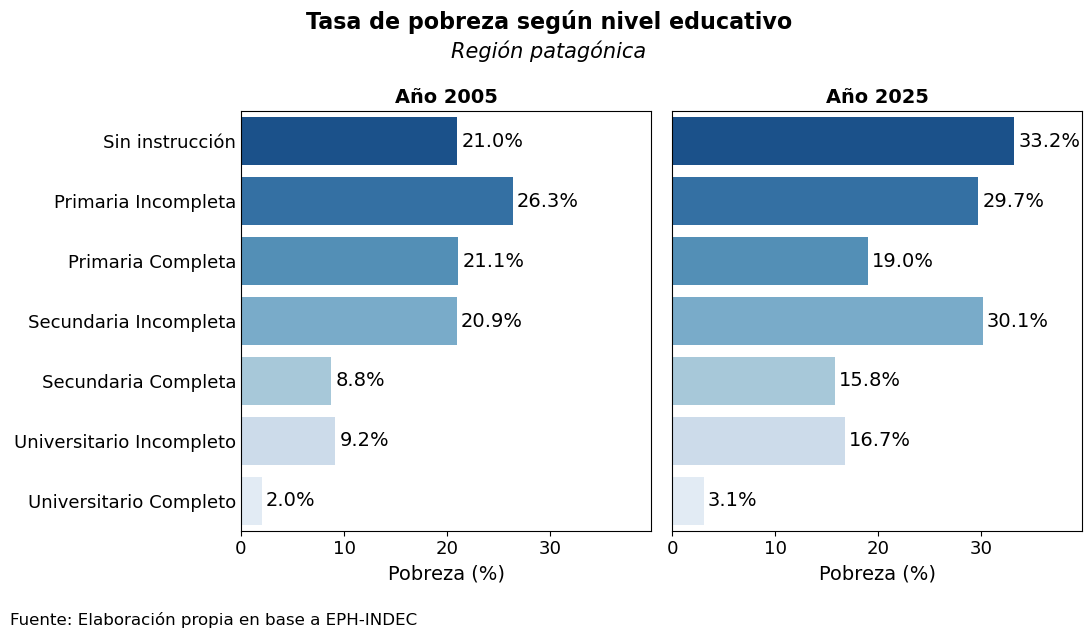

In [2357]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap


def map_nivel(s):
    s = str(s)
    if 'Sin instrucción' in s:
        return 'Sin instrucción'
    if 'Primaria Incompleta' in s:
        return 'Primaria Incompleta'
    if 'Primaria Completa' in s:
        return 'Primaria Completa'
    if 'Secundaria Incompleta' in s:
        return 'Secundaria Incompleta'
    if 'Secundaria Completa' in s:
        return 'Secundaria Completa'
    if ('Superior Universitaria Incompleta' in s) or ('Universitaria Incompleta' in s):
        return 'Universitario Incompleto'
    if ('Superior Universitaria Completa' in s) or ('Universitaria Completa' in s):
        return 'Universitario Completo'
    return s

dfp = resumen_pobreza_educacion.copy()

dfp['nivel_simple'] = dfp['nivel_ed'].apply(map_nivel)

# Orden deseado
orden = [
    'Sin instrucción',    
    'Primaria Incompleta',
    'Primaria Completa',
    'Secundaria Incompleta',
    'Secundaria Completa',
    'Universitario Incompleto',
    'Universitario Completo'
]

dfp['nivel_simple'] = pd.Categorical(dfp['nivel_simple'], categories=orden, ordered=True)


anios = sorted(dfp['ano4'].unique())
fig, axes = plt.subplots(1, len(anios), figsize=(11, 6), sharey=True)

if len(anios) == 1:
    axes = [axes]

max_x = dfp['porcentaje_pobres'].max() * 1.2  

for ax, año in zip(axes, anios):
    dfa = dfp[dfp['ano4'] == año].sort_values('nivel_simple')

   
    g = sns.barplot(
        data=dfa,
        x='porcentaje_pobres',
        y='nivel_simple',
        order=orden,
        palette='Blues_r',
        ax=ax
    )

    ax.set_title(f'Año {int(año)}', fontsize=14, fontweight='bold')
    ax.set_xlim(0, max_x)
    ax.set_xlabel('Pobreza (%)', fontsize=14)
    ax.set_ylabel('')
    ax.tick_params(axis='y', length=0, labelsize=13)
    ax.tick_params(axis='x', labelsize=13)

    
    for container in g.containers:
        g.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=14, padding=3)

# Título general
fig.suptitle('Tasa de pobreza según nivel educativo', fontsize=16, fontweight='bold')
plt.figtext(0.5, 0.90, 'Región patagónica',ha='center', fontsize=15, style='italic')
fig.text(0.01, -0.05, 'Fuente: Elaboración propia en base a EPH-INDEC', ha='left', va='bottom', fontsize=12, color='black')
fig.tight_layout(rect=[0, 0, 1, 0.94])
fig.savefig("pobreza_educacion.png", dpi=300, bbox_inches="tight")
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_28580\4097315556.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(
C:\Users\admin\AppData\Local\Temp\ipykernel_28580\4097315556.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(


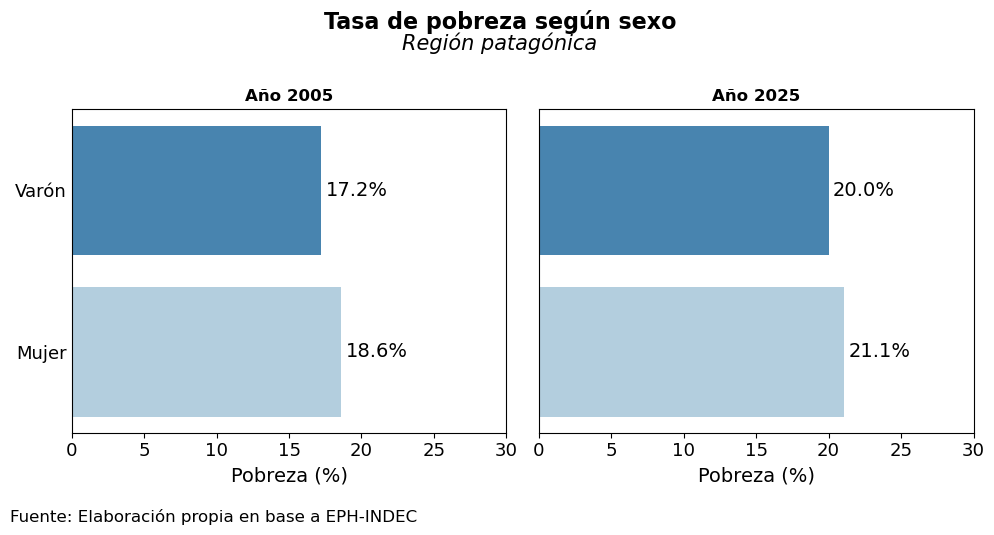

In [2361]:
# Copiamos el df
dfp_sexo = resumen_pobreza_sexo.copy()


orden_sexo = ['Varón', 'Mujer']
dfp_sexo['Sexo'] = pd.Categorical(dfp_sexo['Sexo'], categories=orden_sexo, ordered=True)

anios = [2005,2025]


fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)

if len(anios) == 1:
    axes = [axes]

max_x = dfp_sexo['porcentaje_pobres'].max() * 1.05  # margen extra 5%

for ax, año in zip(axes, anios):
    dfa = dfp_sexo[dfp_sexo['ano4'] == año]

   
    g = sns.barplot(
        data=dfa,
        x='porcentaje_pobres',
        y='Sexo',
        order=orden_sexo,
        palette='Blues_r',
        ax=ax
    )

    ax.set_title(f'Año {int(año)}', fontsize=12, fontweight='bold')
    ax.set_xlim(0, 30)
    ax.set_xlabel('Pobreza (%)',fontsize=14)
    ax.grid(False, axis='x')
    ax.set_ylabel('')
    ax.tick_params(axis='y', length=0, labelsize=13)
    ax.tick_params(axis='x', labelsize=13)

   
    for container in g.containers:
        g.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=14, padding=3)

fig.suptitle('Tasa de pobreza según sexo', fontsize=16, fontweight='bold')
plt.figtext(0.5, 0.90, 'Región patagónica',ha='center', fontsize=15, style='italic')
fig.text(0.01, -0.05, 'Fuente: Elaboración propia en base a EPH-INDEC', ha='left', va='bottom', fontsize=12, color='black')
fig.tight_layout(rect=[0, 0, 1, 0.93])
fig.savefig("pobreza_sexo.png", dpi=300, bbox_inches="tight")
plt.show()
